## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.kaggle.json
!ls ~/.kaggle

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!kaggle datasets download -d ahmedmmmahmoud/kc-house-data

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!mkdir kc-house-data
!unzip kc-house-data.zip -d kc-house-data
!ls kc-house-data

A subdirectory or file kc-house-data already exists.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


## Reading data

In [ ]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

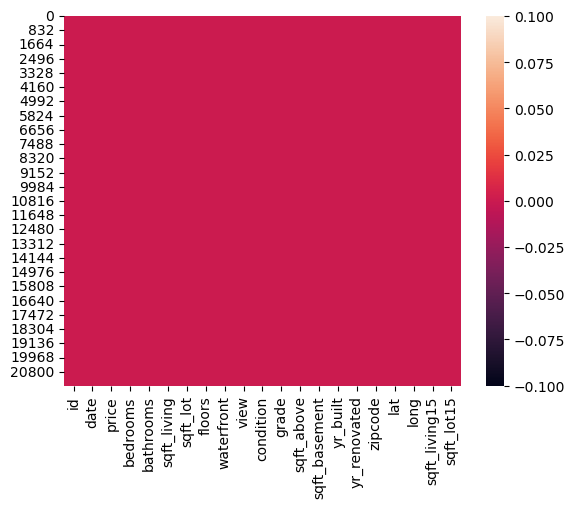

In [ ]:
sns.heatmap(data.isnull())

<Axes: >

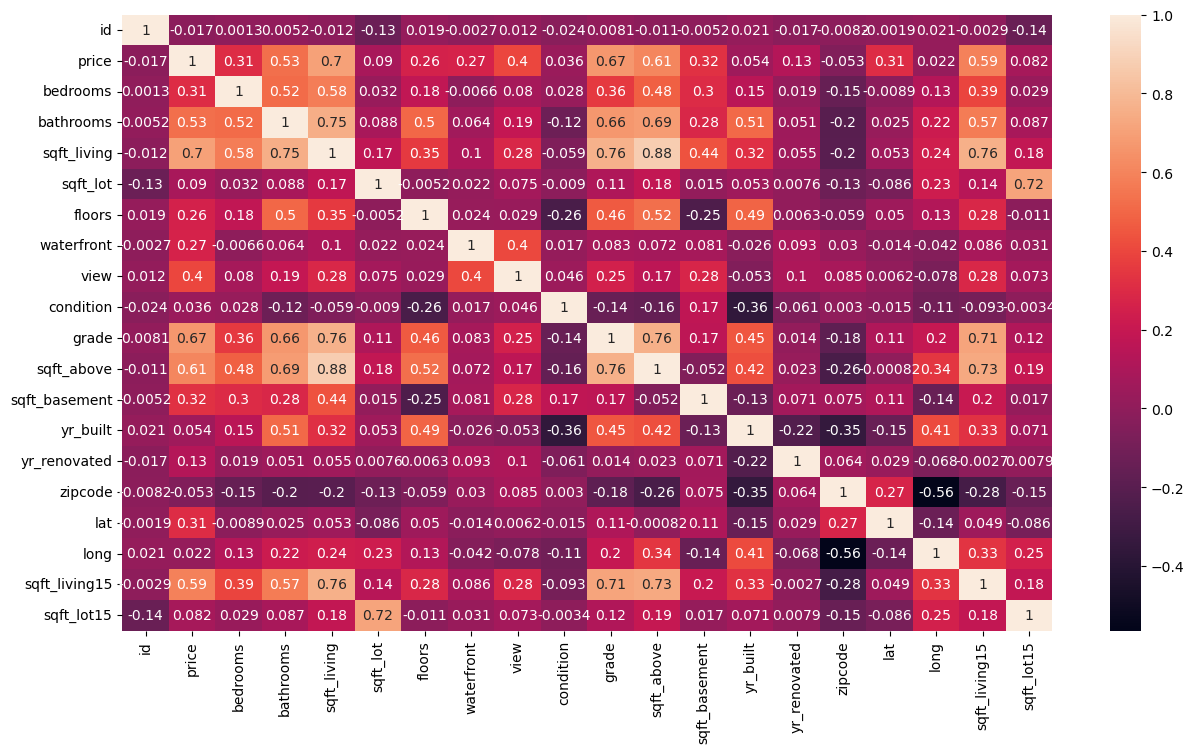

In [ ]:
data = data.drop(columns=['date'])
correlation_matrix = data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data[data.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [ ]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


## Dependent and Independent variables

In [ ]:
x = data.drop(['id', 'price'], axis=1)
y = data['price']

## pair Plotting

c:\Users\awwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


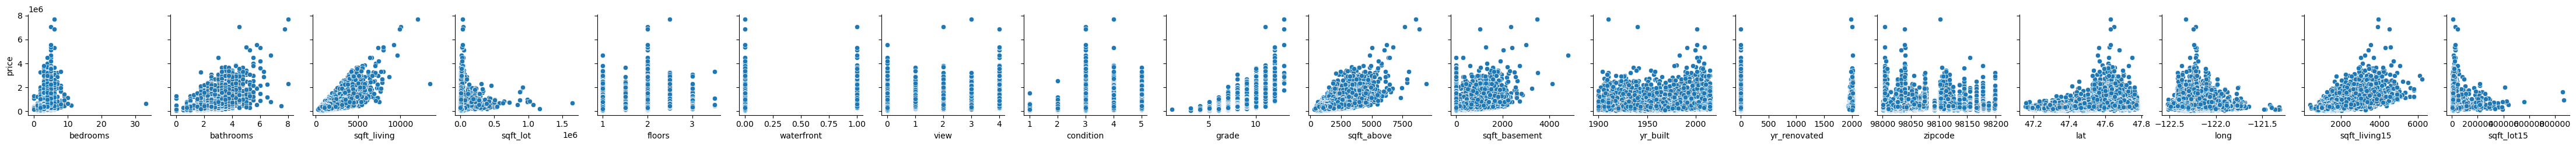

In [ ]:
plot_x=list(x)
plot_y=['price']
sns.pairplot(data,x_vars=plot_x,y_vars=plot_y)

## Training and Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

print("x_train.shape ",x_train.shape)
print("y_train.shape ",y_train.shape)
print("x_test.shape ",x_test.shape)
print("y_test.shape ",y_test.shape)

x_train.shape  (16209, 18)
y_train.shape  (16209,)
x_test.shape  (5404, 18)
y_test.shape  (5404,)


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
y_pred=le.predict(x_test)
y_pred


array([511923.95937039, -49482.93692519, 669098.20226891, ...,
       827704.61797419, 247456.64668088, 744997.47575593])

## Evaluation of Metrics

In [ ]:
from sklearn import metrics
print("r_2 score is:",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error( y_test,y_pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred)) 
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r_2 score is: 0.7066787500012532
Mean Absolute Error: 126008.92653280184
Mean Squared Error: 40597428449.48715
Root Mean Squared Error: 201488.03549959772


## Graph Plotting of Prediction values

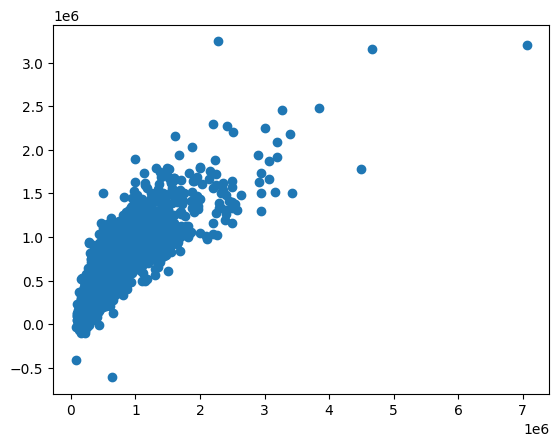

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

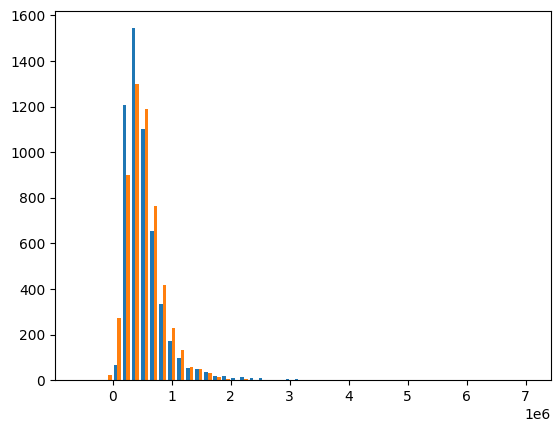

In [ ]:
plt.hist((y_test,y_pred),bins=50)
plt.show()
#It's almost normal distribution,which is good!

##  GradientBoostingRegressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor(n_estimators=100,random_state=0)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
pred

array([561444.8206909 , 206339.2826008 , 728257.35792896, ...,
       750466.06181074, 270824.80129431, 611418.83262959])

In [ ]:
print("r_2 score: ",metrics.r2_score(y_test,pred))
print("Mean Absolute Error:", metrics.mean_absolute_error( y_test,pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred)) 
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

r_2 score:  0.85252487799134
Mean Absolute Error: 79604.45482784514
Mean Squared Error: 20411445518.698498
Root Mean Squared Error: 142868.6302821529


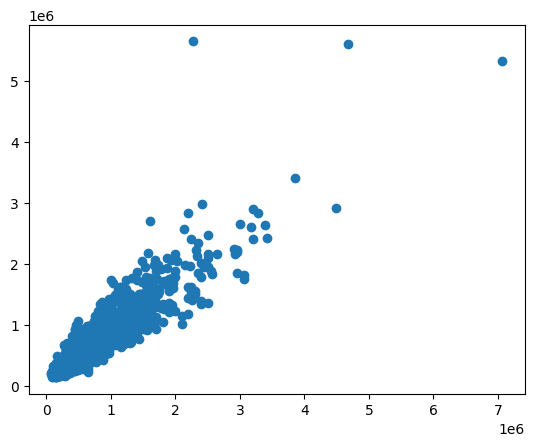

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.show()

## RandomForestRegressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100,random_state=0)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
pred

array([542165.98333333, 226280.415     , 795872.56      , ...,
       745983.4       , 297349.32333333, 653080.5       ])

In [ ]:
print("r_2 score is:",metrics.r2_score(y_test,pred))
print("Mean Absolute Error:", metrics.mean_absolute_error( y_test,pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred)) 
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

r_2 score is: 0.8735567860654325
Mean Absolute Error: 71027.63251842844
Mean Squared Error: 17500502710.436874
Root Mean Squared Error: 132289.46560643773


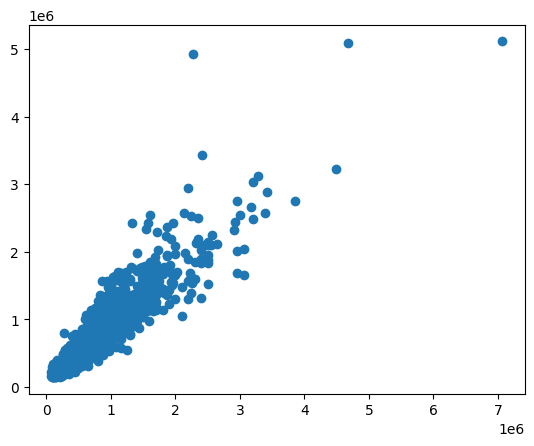

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.show()

## Comparison of r_2 scores among implemented Models

In [ ]:
a=0.70
b=0.85
c=0.87

models={'Linear Regression':a,'Gradient Booster':b,'Random Forest':c} 
names=list(models.keys())
values=list(models.values())

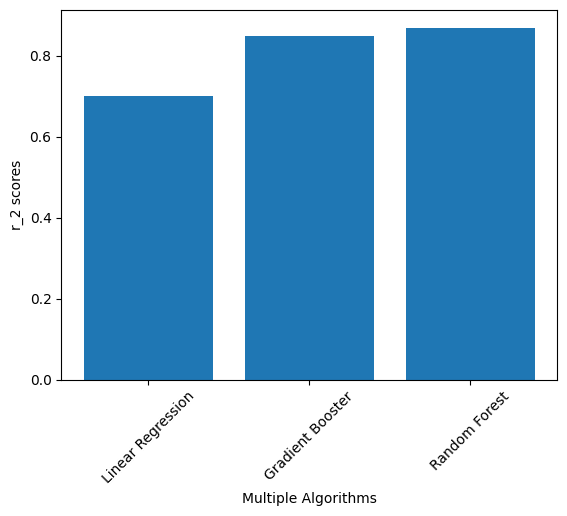

In [ ]:
plt.xticks(rotation=45)
plt.bar(names,values)
plt.xlabel("Multiple Algorithms")
plt.ylabel("r_2 scores")
plt.show()

In [ ]:
import pickle
from sklearn.linear_model import LinearRegression

# Create and train a model (in this case, a Linear Regression model)
lr = LinearRegression()
# You should train the model with your data here

# Define a filename for the pickle file
filename = 'price-prediction.sav'

# Pickle (serialize) the model to a file
with open(filename, 'wb') as file:
    pickle.dump(lr, file)
